# Neural network classification with TensorFlow

In this notebook, we try to learn simple neural network classification problems. 


A few types of classification problems:



*   Binary classification
*   Mutliclass classification
* Multilabel classification


[See full course materials on GitHub](https://github.com/mrdbourke/tensorflow-deep-learning/)

###Creating data

In [19]:
from sklearn.datasets import make_circles
num_of_samples = 100
X, y = make_circles(num_of_samples,
                   noise = 0.02,
                   random_state = 42)

In [20]:
X[:5],y[:5]

(array([[-0.41593533, -0.69359675],
        [ 0.75334204,  0.32057287],
        [-0.64298186,  0.48216909],
        [ 0.79109029, -0.59002501],
        [ 0.75834745, -0.70702507]]),
 array([1, 1, 1, 0, 0]))

In [21]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,-0.415935,-0.693597,1
1,0.753342,0.320573,1
2,-0.642982,0.482169,1
3,0.791090,-0.590025,0
4,0.758347,-0.707025,0
...,...,...,...
95,0.245070,0.751121,1
96,-0.669186,0.376724,1
97,-0.202035,0.970722,0
98,0.425947,-0.691332,1


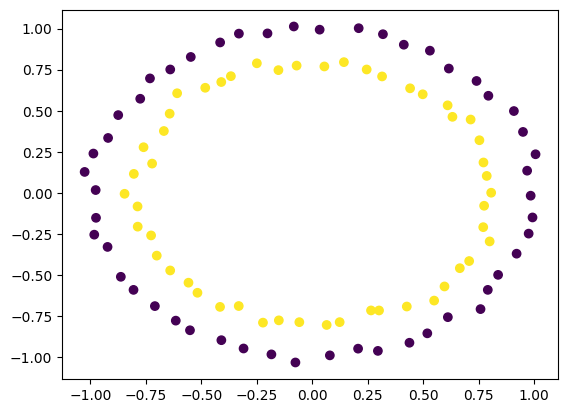

In [22]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.viridis)

### Modelling

In [5]:
import tensorflow as tf

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=200,verbose = 0)
model_1.evaluate(X,y)

4/4 [==============================] - 0s 8ms/step - loss: 0.6937 - accuracy: 0.5000


[0.6937280297279358, 0.5]

## Improving a Model

*   Adding layers
*   Increase the number of hidden units
*   Change the activation function
*   Change the optimization function 
*   Change the learning rate
*   Fitting on more data
*   Fitting for longer




In [6]:
# Adding hidden Layer
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)

])

model_2.compile(loss =tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer =tf.keras.optimizers.SGD(),
                metrics=["accuracy"])


model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=200,verbose = 0)
model_2.evaluate(X,y)

4/4 [==============================] - 0s 4ms/step - loss: 0.1736 - accuracy: 0.5000


[0.17360517382621765, 0.5]

In [7]:
# Change Optimizer
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)

])

model_3.compile(loss =tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer =tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


model_3.fit(tf.expand_dims(X, axis=-1), y, epochs=200,verbose = 0)
model_3.evaluate(X,y)

4/4 [==============================] - 0s 5ms/step - loss: 0.2983 - accuracy: 0.4941


[0.2982879877090454, 0.49406251311302185]

In [8]:
# Increase the number of hidden units
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

model_4.compile(loss =tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer =tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


model_4.fit(tf.expand_dims(X, axis=-1), y, epochs=200,verbose = 0)
model_4.evaluate(X,y)

4/4 [==============================] - 0s 4ms/step - loss: 0.1844 - accuracy: 0.5000


[0.18440861999988556, 0.5]

In [9]:
#Add hidden layer and increase the number of hidden units
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

model_5.compile(loss =tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer =tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


model_5.fit(tf.expand_dims(X, axis=-1), y, epochs=200,verbose = 0)
model_5.evaluate(X,y)

4/4 [==============================] - 0s 4ms/step - loss: 0.1733 - accuracy: 0.5000


[0.1733161360025406, 0.5]

##Visulize

In [10]:
import numpy as np

In [16]:
#Visulize our model's predictions

def plot_decision_boundary(model, X, y):

  """
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """

  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(),yy.ravel()] # .c stack 2D arrays together
            
  y_pred = model.predict(x_in)
  y_pred = np.argmax(y_pred, axis =1).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap = plt.cm.viridis)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())  

313/313 [==============================] - 0s 866us/step


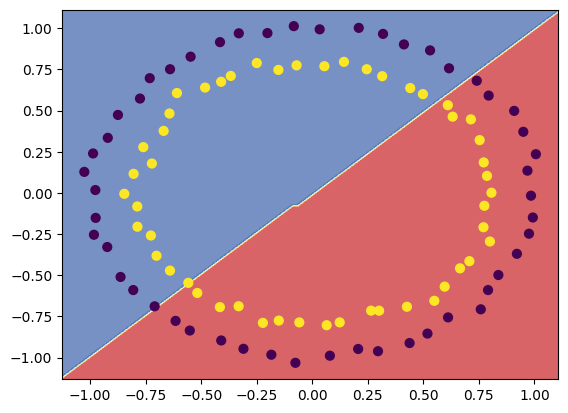

In [17]:
plot_decision_boundary(model = model_5,
                       X=X, 
                       y=y)